# Treinando Redes Neurais usando Keras

In [1]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# loading fashion mnist
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

# data normalization
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

In [2]:
X_input = keras.layers.Input(shape=[28, 28])

h0    = keras.layers.Flatten()(X_input)
h1    = keras.layers.Dense(300, activation="relu")(h0)
h2    = keras.layers.Dense(200, activation="relu")(h1)
h3    = keras.layers.Dense(100, activation="relu")(h2)
h4    = keras.layers.Dense( 50, activation="relu")(h3)
yhat  = keras.layers.Dense(10, activation="softmax")(h4)
model = keras.models.Model(inputs=[X_input], outputs=[yhat])

model.compile(loss = "sparse_categorical_crossentropy",
             optimizer = "sgd",
             metrics = ["accuracy"])

In [3]:
h = model.fit(X_train, y_train, epochs = 10, 
             validation_data = (X_valid, y_valid))

W0915 15:41:48.165146 4568876480 training_utils.py:1211] When passing input data as arrays, do not specify `steps_per_epoch`/`steps` argument. Please use `batch_size` instead.


Epoch 1/10


W0915 15:41:48.475170 4568876480 deprecation.py:323] From /Users/marcocristo/.local/lib/python3.6/site-packages/tensorflow_core/python/keras/optimizer_v2/optimizer_v2.py:468: BaseResourceVariable.constraint (from tensorflow.python.ops.resource_variable_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Apply a constraint manually following the optimizer update step.


55000/55000 [==============================] - 6s 118us/sample - loss: 0.7432 - accuracy: 0.7514 - val_loss: 0.5027 - val_accuracy: 0.8242
Epoch 2/10
55000/55000 [==============================] - 6s 109us/sample - loss: 0.4807 - accuracy: 0.8298 - val_loss: 0.4423 - val_accuracy: 0.8452
Epoch 3/10
55000/55000 [==============================] - 6s 111us/sample - loss: 0.4254 - accuracy: 0.8497 - val_loss: 0.4265 - val_accuracy: 0.8434
Epoch 4/10
55000/55000 [==============================] - 6s 100us/sample - loss: 0.3911 - accuracy: 0.8580 - val_loss: 0.3991 - val_accuracy: 0.8558
Epoch 5/10
55000/55000 [==============================] - 5s 99us/sample - loss: 0.3660 - accuracy: 0.8681 - val_loss: 0.3651 - val_accuracy: 0.8698
Epoch 6/10
55000/55000 [==============================] - 5s 98us/sample - loss: 0.3474 - accuracy: 0.8749 - val_loss: 0.3502 - val_accuracy: 0.8718
Epoch 7/10
55000/55000 [==============================] - 6s 100us/sample - loss: 0.3330 - accuracy: 0.8790 - val

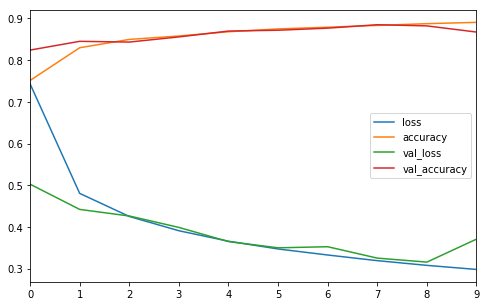

In [4]:
pd.DataFrame(h.history).plot(figsize = (8,5))

## Inicialização

Seja $f_{in}$ o número de neurônios na entrada da camada e $f_{out}$, o número na saída. As seguintes técnicas de inicialização são sugeridas:

* __Glorot__: nada, tanh, logística, softmax; $\sigma^2 = \frac{1}{f_{avg}}; f_{avg} = \frac{f_{in} + f_{out}}{2}$
* __He__: relu, elu e variantes; $\sigma^2 = \frac{2}{f_{in}}$
* __LeCun__: selu; $\sigma^2 = \frac{1}{f_{in}}$

O default do Keras é Glorot com distribuição uniforme.

In [3]:
X_input = keras.layers.Input(shape=[28, 28])

h0    = keras.layers.Flatten()(X_input)
h1    = keras.layers.Dense(300, activation="relu", kernel_initializer="he_normal")(h0) # Usar He Normal com relu
h2    = keras.layers.Dense(200, activation="relu", kernel_initializer="he_normal")(h1)
h3    = keras.layers.Dense(100, activation="relu", kernel_initializer="he_normal")(h2)
h4    = keras.layers.Dense( 50, activation="relu", kernel_initializer="he_normal")(h3)
yhat  = keras.layers.Dense(10, activation="softmax")(h4)
model = keras.models.Model(inputs=[X_input], outputs=[yhat])

model.compile(loss = "sparse_categorical_crossentropy",
             optimizer = "sgd",
             metrics = ["accuracy"])

In [6]:
h = model.fit(X_train, y_train, epochs = 10, 
             validation_data = (X_valid, y_valid))

W0915 15:42:45.092111 4568876480 training_utils.py:1211] When passing input data as arrays, do not specify `steps_per_epoch`/`steps` argument. Please use `batch_size` instead.


Epoch 1/10
55000/55000 [==============================] - 7s 122us/sample - loss: 0.6733 - accuracy: 0.7715 - val_loss: 0.4638 - val_accuracy: 0.8402
Epoch 2/10
55000/55000 [==============================] - 6s 116us/sample - loss: 0.4490 - accuracy: 0.8419 - val_loss: 0.4389 - val_accuracy: 0.8426
Epoch 3/10
55000/55000 [==============================] - 6s 116us/sample - loss: 0.4012 - accuracy: 0.8574 - val_loss: 0.4150 - val_accuracy: 0.8490
Epoch 4/10
55000/55000 [==============================] - 6s 118us/sample - loss: 0.3724 - accuracy: 0.8674 - val_loss: 0.3717 - val_accuracy: 0.8618
Epoch 5/10
55000/55000 [==============================] - 6s 116us/sample - loss: 0.3508 - accuracy: 0.8743 - val_loss: 0.3635 - val_accuracy: 0.8704
Epoch 6/10
55000/55000 [==============================] - 6s 114us/sample - loss: 0.3324 - accuracy: 0.8807 - val_loss: 0.3518 - val_accuracy: 0.8768
Epoch 7/10
55000/55000 [==============================] - 6s 107us/sample - loss: 0.3185 - accuracy:

Agora vamos usar uma inicialização diferente para a camada sigmoid. Assim, em lugar de He uniforme baseada em $f_{in}$, optamos por He uniforme baseada em $f_{avg}$:

In [4]:
he_avg_init = keras.initializers.VarianceScaling(scale=2., mode='fan_avg', 
                                                 distribution='uniform')

In [5]:
yhat  = keras.layers.Dense(10, activation="sigmoid", 
                           kernel_initializer=he_avg_init, name = "nova_out")(h4)
model = keras.models.Model(inputs=[X_input], outputs=[yhat])

model.compile(loss = "sparse_categorical_crossentropy",
             optimizer = "sgd",
             metrics = ["accuracy"])

In [6]:
model.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 28, 28)]          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 300)               235500    
_________________________________________________________________
dense_6 (Dense)              (None, 200)               60200     
_________________________________________________________________
dense_7 (Dense)              (None, 100)               20100     
_________________________________________________________________
dense_8 (Dense)              (None, 50)                5050      
_________________________________________________________________
nova_out (Dense)             (None, 10)                510 

In [10]:
h = model.fit(X_train, y_train, epochs = 10, 
             validation_data = (X_valid, y_valid))

W0915 15:43:47.710911 4568876480 training_utils.py:1211] When passing input data as arrays, do not specify `steps_per_epoch`/`steps` argument. Please use `batch_size` instead.


Epoch 1/10


W0915 15:43:47.991872 4568876480 deprecation.py:323] From /Users/marcocristo/.local/lib/python3.6/site-packages/tensorflow_core/python/ops/math_grad.py:1393: where (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


55000/55000 [==============================] - 6s 114us/sample - loss: 0.6074 - accuracy: 0.7311 - val_loss: 0.3573 - val_accuracy: 0.8720
Epoch 2/10
55000/55000 [==============================] - 6s 109us/sample - loss: 0.3251 - accuracy: 0.8822 - val_loss: 0.3622 - val_accuracy: 0.8724
Epoch 3/10
55000/55000 [==============================] - 6s 109us/sample - loss: 0.3007 - accuracy: 0.8913 - val_loss: 0.3326 - val_accuracy: 0.8816
Epoch 4/10
55000/55000 [==============================] - 6s 109us/sample - loss: 0.2850 - accuracy: 0.8958 - val_loss: 0.3234 - val_accuracy: 0.8794
Epoch 5/10
55000/55000 [==============================] - 6s 108us/sample - loss: 0.2738 - accuracy: 0.9001 - val_loss: 0.3186 - val_accuracy: 0.8856
Epoch 6/10
55000/55000 [==============================] - 6s 108us/sample - loss: 0.2625 - accuracy: 0.9041 - val_loss: 0.3336 - val_accuracy: 0.8812
Epoch 7/10
55000/55000 [==============================] - 6s 110us/sample - loss: 0.2544 - accuracy: 0.9060 - v

## Funções de ativação -- buscando a mínima saturação

A função sigmoid é famosa por sua alta saturação. Várias alternativas de menor saturação tem sido adotadas, entre elas, destacamos:
    
* ReLU: baixa saturação à direita
* LeakyReLU: baixa saturação à direita e à esquerda 
* ELU: baixa saturação à direita e à esquerda, com forma exponencial à esquerda; 
* SELU: baixa saturação com capacidade de auto-normalização para MLPs e vários tipos de CNNs; dispensa BatchNormalization;

In [7]:
x = np.linspace(-5,5,50)

In [8]:
y = [tf.nn.sigmoid(x), tf.nn.tanh(x), 
     tf.nn.relu(x), tf.nn.leaky_relu(x), 
     tf.nn.elu(x), tf.nn.selu(x)]
gy = [np.gradient(y[0], x), np.gradient(y[1], x), 
      np.gradient(y[2], x), np.gradient(y[3], x), 
      np.gradient(y[4], x), np.gradient(y[5], x)]

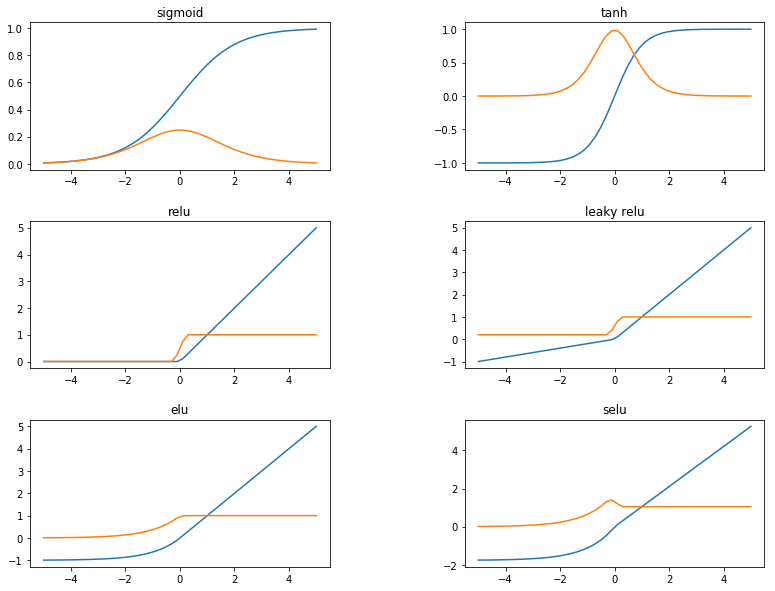

In [9]:
plt.figure(figsize=(12, 9))

for idx, plot_title in enumerate([(321, 'sigmoid'), (322, 'tanh'), (323, 'relu'), 
                                  (324, 'leaky relu'), (325, 'elu'), (326, 'selu')]):
    plt.subplot(plot_title[0])
    plt.plot(x, y[idx])
    plt.plot(x, gy[idx])
    plt.title(plot_title[1])
    
plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, 
                    hspace=0.35, wspace=0.45)

In [10]:
leakyrelu = keras.layers.LeakyReLU(alpha=0.2)

X_input = keras.layers.Input(shape=[28, 28])

h0    = keras.layers.Flatten()(X_input)
h1    = keras.layers.Dense(300, activation=leakyrelu, kernel_initializer="he_normal")(h0) # Usar He Normal com relu
h2    = keras.layers.Dense(200, activation=leakyrelu, kernel_initializer="he_normal")(h1)
h3    = keras.layers.Dense(100, activation=leakyrelu, kernel_initializer="he_normal")(h2)
h4    = keras.layers.Dense( 50, activation=leakyrelu, kernel_initializer="he_normal")(h3)
yhat  = keras.layers.Dense(10, activation="softmax")(h4)
model = keras.models.Model(inputs=[X_input], outputs=[yhat])

model.compile(loss = "sparse_categorical_crossentropy",
             optimizer = "sgd",
             metrics = ["accuracy"])

In [11]:
h = model.fit(X_train, y_train, epochs = 10, 
             validation_data = (X_valid, y_valid))

W0923 13:31:56.694061 4731512256 training_utils.py:1211] When passing input data as arrays, do not specify `steps_per_epoch`/`steps` argument. Please use `batch_size` instead.


Epoch 1/10


W0923 13:31:57.039575 4731512256 deprecation.py:323] From /Users/marcocristo/.local/lib/python3.6/site-packages/tensorflow_core/python/keras/optimizer_v2/optimizer_v2.py:468: BaseResourceVariable.constraint (from tensorflow.python.ops.resource_variable_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Apply a constraint manually following the optimizer update step.


55000/55000 [==============================] - 7s 130us/sample - loss: 0.6410 - accuracy: 0.7782 - val_loss: 0.4523 - val_accuracy: 0.8462
Epoch 2/10
55000/55000 [==============================] - 6s 117us/sample - loss: 0.4456 - accuracy: 0.8413 - val_loss: 0.4208 - val_accuracy: 0.8534
Epoch 3/10
55000/55000 [==============================] - 7s 119us/sample - loss: 0.4022 - accuracy: 0.8563 - val_loss: 0.4048 - val_accuracy: 0.8562
Epoch 4/10
55000/55000 [==============================] - 7s 119us/sample - loss: 0.3754 - accuracy: 0.8655 - val_loss: 0.3736 - val_accuracy: 0.8640
Epoch 5/10
55000/55000 [==============================] - 6s 115us/sample - loss: 0.3557 - accuracy: 0.8721 - val_loss: 0.3768 - val_accuracy: 0.8652
Epoch 6/10
55000/55000 [==============================] - 6s 114us/sample - loss: 0.3393 - accuracy: 0.8785 - val_loss: 0.3548 - val_accuracy: 0.8738
Epoch 7/10
55000/55000 [==============================] - 6s 114us/sample - loss: 0.3256 - accuracy: 0.8812 - v

In [12]:
X_input = keras.layers.Input(shape=[28, 28])

h0    = keras.layers.Flatten()(X_input)
h1    = keras.layers.Dense(300, activation='elu', kernel_initializer="he_normal")(h0) # Usar He Normal com relu
h2    = keras.layers.Dense(200, activation='elu', kernel_initializer="he_normal")(h1)
h3    = keras.layers.Dense(100, activation='elu', kernel_initializer="he_normal")(h2)
h4    = keras.layers.Dense( 50, activation='elu', kernel_initializer="he_normal")(h3)
yhat  = keras.layers.Dense(10, activation="softmax")(h4)
model = keras.models.Model(inputs=[X_input], outputs=[yhat])

model.compile(loss = "sparse_categorical_crossentropy",
             optimizer = "sgd",
             metrics = ["accuracy"])

In [17]:
h = model.fit(X_train, y_train, epochs = 10, 
             validation_data = (X_valid, y_valid))

W0915 15:45:48.520771 4568876480 training_utils.py:1211] When passing input data as arrays, do not specify `steps_per_epoch`/`steps` argument. Please use `batch_size` instead.


Epoch 1/10
55000/55000 [==============================] - 6s 116us/sample - loss: 0.5621 - accuracy: 0.7995 - val_loss: 0.4277 - val_accuracy: 0.8524
Epoch 2/10
55000/55000 [==============================] - 6s 111us/sample - loss: 0.4261 - accuracy: 0.8465 - val_loss: 0.4265 - val_accuracy: 0.8508
Epoch 3/10
55000/55000 [==============================] - 6s 110us/sample - loss: 0.3916 - accuracy: 0.8594 - val_loss: 0.4067 - val_accuracy: 0.8546
Epoch 4/10
55000/55000 [==============================] - 6s 111us/sample - loss: 0.3690 - accuracy: 0.8660 - val_loss: 0.3657 - val_accuracy: 0.8688
Epoch 5/10
55000/55000 [==============================] - 6s 109us/sample - loss: 0.3514 - accuracy: 0.8726 - val_loss: 0.3670 - val_accuracy: 0.8722
Epoch 6/10
55000/55000 [==============================] - 6s 109us/sample - loss: 0.3372 - accuracy: 0.8790 - val_loss: 0.3464 - val_accuracy: 0.8756
Epoch 7/10
55000/55000 [==============================] - 6s 110us/sample - loss: 0.3254 - accuracy:

In [13]:
X_input = keras.layers.Input(shape=[28, 28])

h0    = keras.layers.Flatten()(X_input)
h1    = keras.layers.Dense(300, activation='selu', kernel_initializer="lecun_normal")(h0) # Usar Lecun Normal com selu
h2    = keras.layers.Dense(200, activation='selu', kernel_initializer="lecun_normal")(h1)
h3    = keras.layers.Dense(100, activation='selu', kernel_initializer="lecun_normal")(h2)
h4    = keras.layers.Dense( 50, activation='selu', kernel_initializer="lecun_normal")(h3)
yhat  = keras.layers.Dense(10, activation="softmax")(h4)
model = keras.models.Model(inputs=[X_input], outputs=[yhat])

model.compile(loss = "sparse_categorical_crossentropy",
             optimizer = "sgd",
             metrics = ["accuracy"])

W0923 13:33:01.188125 4731512256 deprecation.py:323] From /Users/marcocristo/.local/lib/python3.6/site-packages/tensorflow_core/python/keras/backend.py:4242: where (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [19]:
h = model.fit(X_train, y_train, epochs = 10, 
             validation_data = (X_valid, y_valid))

W0915 15:46:49.604120 4568876480 training_utils.py:1211] When passing input data as arrays, do not specify `steps_per_epoch`/`steps` argument. Please use `batch_size` instead.


Epoch 1/10
55000/55000 [==============================] - 6s 116us/sample - loss: 0.5416 - accuracy: 0.8071 - val_loss: 0.4277 - val_accuracy: 0.8518
Epoch 2/10
55000/55000 [==============================] - 6s 111us/sample - loss: 0.4219 - accuracy: 0.8467 - val_loss: 0.4265 - val_accuracy: 0.8454
Epoch 3/10
55000/55000 [==============================] - 6s 111us/sample - loss: 0.3905 - accuracy: 0.8602 - val_loss: 0.3992 - val_accuracy: 0.8520
Epoch 4/10
55000/55000 [==============================] - 6s 110us/sample - loss: 0.3692 - accuracy: 0.8661 - val_loss: 0.3634 - val_accuracy: 0.8684
Epoch 5/10
55000/55000 [==============================] - 6s 115us/sample - loss: 0.3522 - accuracy: 0.8727 - val_loss: 0.3684 - val_accuracy: 0.8662
Epoch 6/10
55000/55000 [==============================] - 6s 115us/sample - loss: 0.3385 - accuracy: 0.8780 - val_loss: 0.3495 - val_accuracy: 0.8696
Epoch 7/10
55000/55000 [==============================] - 7s 127us/sample - loss: 0.3272 - accuracy:

## Normalização em Batches

Evitar a deriva da variância. Não faz sentido com SELU, uma vez que a SELU já alcança auto-normalização das camadas. 

O uso de BN é tão padrão que é comum ela não ser mencionada em arquiteturas MLP e CNN, mesmo sendo usada. Mais recentemente, um artigo propôs um novo tipo de inicialização (Zhang et al. "Fixup Initialization: Residual Learning Without Normalization", 2019) que parece dispensar BN (ver https://arxiv.org/abs/1901.09321).

Há duas formas de usar BN: entre saída e ativação (o mais indicado) e após ativação. 

In [14]:
X_input = keras.layers.Input(shape=[28, 28])

h0    = keras.layers.Flatten()(X_input)
h1    = keras.layers.Dense(300, kernel_initializer="he_normal")(h0) 
h1    = keras.layers.BatchNormalization()(h1)
h1    = keras.layers.Activation('elu')(h1)
h2    = keras.layers.Dense(200, kernel_initializer="he_normal")(h1)
h2    = keras.layers.BatchNormalization()(h2)
h2    = keras.layers.Activation('elu')(h1)
h3    = keras.layers.Dense(100, kernel_initializer="he_normal")(h2)
h3    = keras.layers.BatchNormalization()(h3)
h3    = keras.layers.Activation('elu')(h3)
h4    = keras.layers.Dense( 50, kernel_initializer="he_normal")(h3)
h4    = keras.layers.BatchNormalization()(h4)
h4    = keras.layers.Activation('elu')(h4)
yhat  = keras.layers.Dense(10, activation="softmax")(h4)
model = keras.models.Model(inputs=[X_input], outputs=[yhat])

model.compile(loss = "sparse_categorical_crossentropy",
             optimizer = "sgd",
             metrics = ["accuracy"])

In [21]:
h = model.fit(X_train, y_train, epochs = 10, 
             validation_data = (X_valid, y_valid))

W0915 15:47:54.737896 4568876480 training_utils.py:1211] When passing input data as arrays, do not specify `steps_per_epoch`/`steps` argument. Please use `batch_size` instead.


Epoch 1/10
55000/55000 [==============================] - 7s 129us/sample - loss: 0.5897 - accuracy: 0.8027 - val_loss: 0.4104 - val_accuracy: 0.8582
Epoch 2/10
55000/55000 [==============================] - 7s 119us/sample - loss: 0.4326 - accuracy: 0.8473 - val_loss: 0.3841 - val_accuracy: 0.8640
Epoch 3/10
55000/55000 [==============================] - 6s 118us/sample - loss: 0.3904 - accuracy: 0.8631 - val_loss: 0.3570 - val_accuracy: 0.8716
Epoch 4/10
55000/55000 [==============================] - 6s 118us/sample - loss: 0.3639 - accuracy: 0.8700 - val_loss: 0.3665 - val_accuracy: 0.8660
Epoch 5/10
55000/55000 [==============================] - 7s 123us/sample - loss: 0.3435 - accuracy: 0.8786 - val_loss: 0.3395 - val_accuracy: 0.8752
Epoch 6/10
55000/55000 [==============================] - 6s 116us/sample - loss: 0.3244 - accuracy: 0.8842 - val_loss: 0.3319 - val_accuracy: 0.8780
Epoch 7/10
55000/55000 [==============================] - 7s 119us/sample - loss: 0.3115 - accuracy:

In [22]:
X_input = keras.layers.Input(shape=[28, 28])

h0    = keras.layers.Flatten()(X_input)
h1    = keras.layers.Dense(300, activation='elu', kernel_initializer="he_normal")(h0) 
h1    = keras.layers.BatchNormalization()(h1)
h2    = keras.layers.Dense(200, activation='elu', kernel_initializer="he_normal")(h1)
h2    = keras.layers.BatchNormalization()(h2)
h3    = keras.layers.Dense(100, activation='elu', kernel_initializer="he_normal")(h2)
h3    = keras.layers.BatchNormalization()(h3)
h4    = keras.layers.Dense( 50, activation='elu', kernel_initializer="he_normal")(h3)
h4    = keras.layers.BatchNormalization()(h4)
yhat  = keras.layers.Dense(10, activation="softmax")(h4)
model = keras.models.Model(inputs=[X_input], outputs=[yhat])

model.compile(loss = "sparse_categorical_crossentropy",
             optimizer = "sgd",
             metrics = ["accuracy"])

In [23]:
h = model.fit(X_train, y_train, epochs = 10, 
             validation_data = (X_valid, y_valid))

W0915 15:49:02.262249 4568876480 training_utils.py:1211] When passing input data as arrays, do not specify `steps_per_epoch`/`steps` argument. Please use `batch_size` instead.


Epoch 1/10
55000/55000 [==============================] - 9s 169us/sample - loss: 0.5522 - accuracy: 0.8088 - val_loss: 0.3934 - val_accuracy: 0.8624
Epoch 2/10
55000/55000 [==============================] - 8s 147us/sample - loss: 0.4157 - accuracy: 0.8504 - val_loss: 0.3682 - val_accuracy: 0.8698
Epoch 3/10
55000/55000 [==============================] - 8s 139us/sample - loss: 0.3748 - accuracy: 0.8672 - val_loss: 0.3454 - val_accuracy: 0.8758
Epoch 4/10
55000/55000 [==============================] - 8s 139us/sample - loss: 0.3491 - accuracy: 0.8739 - val_loss: 0.3346 - val_accuracy: 0.8748
Epoch 5/10
55000/55000 [==============================] - 7s 130us/sample - loss: 0.3305 - accuracy: 0.8799 - val_loss: 0.3214 - val_accuracy: 0.8842
Epoch 6/10
55000/55000 [==============================] - 7s 134us/sample - loss: 0.3105 - accuracy: 0.8880 - val_loss: 0.3096 - val_accuracy: 0.8902
Epoch 7/10
55000/55000 [==============================] - 7s 124us/sample - loss: 0.2983 - accuracy:

In [24]:
model.layers

In [25]:
[(var.name, var.trainable) for var in model.layers[3].variables]

[('batch_normalization_4/gamma:0', True),
 ('batch_normalization_4/beta:0', True),
 ('batch_normalization_4/moving_mean:0', False),
 ('batch_normalization_4/moving_variance:0', False)]

## Clipping de gradientes

Em RNNs não é possível usar nem BN, nem Selu. Logo, a única forma de evitar gradientes explodirem ou desaparecerem, é fazendo clipping. Em Keras, isso é facílimo:

In [26]:
optimizer = keras.optimizers.SGD(clipvalue=1.0)

O SGD acima, por exemplo, sempre vai entregar gradientes com valor entre -1 a 1. Qualquer valor fora do intervalo será cortado para o valor mais próximo (-1 ou 1).

## Regularizadores

Penalidade aplicada a conjunto de parâmetros (normalmente os pesos usados no modelo) de forma a selecionar conjuntos de parâmetros que esperamos produzir modelos mais gerais. De fato, a normalização em batches, vista antes, opera também como regularizador ao forçar que os parâmetros entre as instâncias de cada batch sejam tais que a média e desvio do batch seja próxima à média e desvio esperada para a coleção toda após o treino.

Agora vamos ver outros mecanismos comuns de regularização iniciando pelo mais comum de todos, a parada anteciapda.

### Parada antecipada
Ideia: otimização deveria parar quando não é observada melhoria de desempenho após um certo número de épocas de treino em uma coleção de validação. Conjuntos de parâmetros que não produzem ganhos em amostra de validação provavelmente não irão produzir também na população real.

In [264]:
X_input = keras.layers.Input(shape=[28, 28])

h0    = keras.layers.Flatten()(X_input)
h1    = keras.layers.Dense(300, activation='elu', kernel_initializer="he_normal")(h0) 
h1    = keras.layers.BatchNormalization()(h1)
h2    = keras.layers.Dense(200, activation='elu', kernel_initializer="he_normal")(h1)
h2    = keras.layers.BatchNormalization()(h2)
h3    = keras.layers.Dense(100, activation='elu', kernel_initializer="he_normal")(h2)
h3    = keras.layers.BatchNormalization()(h3)
h4    = keras.layers.Dense( 50, activation='elu', kernel_initializer="he_normal")(h3)
h4    = keras.layers.BatchNormalization()(h4)
yhat  = keras.layers.Dense(10, activation="softmax")(h4)
model = keras.models.Model(inputs=[X_input], outputs=[yhat])

model.compile(loss = "sparse_categorical_crossentropy",
             optimizer = "sgd",
             metrics = ["accuracy"])

# keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=0, 
#    verbose=0, mode='auto', baseline=None, restore_best_weights=False)

In [170]:
h = model.fit(X_train, y_train, epochs = 100, 
              callbacks=[keras.callbacks.EarlyStopping(patience=5)],
              validation_data = (X_valid, y_valid))

W0918 12:55:19.245786 4568876480 training_utils.py:1211] When passing input data as arrays, do not specify `steps_per_epoch`/`steps` argument. Please use `batch_size` instead.


Epoch 1/100
55000/55000 [==============================] - 11s 200us/sample - loss: 0.5558 - accuracy: 0.8078 - val_loss: 0.3900 - val_accuracy: 0.8632
Epoch 2/100
55000/55000 [==============================] - 8s 148us/sample - loss: 0.4191 - accuracy: 0.8499 - val_loss: 0.3677 - val_accuracy: 0.8692
Epoch 3/100
55000/55000 [==============================] - 8s 145us/sample - loss: 0.3785 - accuracy: 0.8651 - val_loss: 0.3492 - val_accuracy: 0.8734
Epoch 4/100
55000/55000 [==============================] - 8s 147us/sample - loss: 0.3546 - accuracy: 0.8714 - val_loss: 0.3607 - val_accuracy: 0.8618
Epoch 5/100
55000/55000 [==============================] - 8s 146us/sample - loss: 0.3338 - accuracy: 0.8799 - val_loss: 0.3219 - val_accuracy: 0.8812
Epoch 6/100
55000/55000 [==============================] - 8s 142us/sample - loss: 0.3153 - accuracy: 0.8858 - val_loss: 0.3167 - val_accuracy: 0.8808
Epoch 7/100
55000/55000 [==============================] - 8s 152us/sample - loss: 0.3022 - a

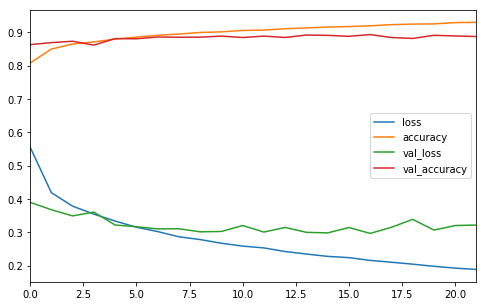

In [171]:
pd.DataFrame(h.history).plot(figsize = (8,5))

### $L_1$ (Lasso) e $L_2$ (Ridge)

Estes regularizadores consistem em restrições ao conjunto de pesos adotados, aplicados diretamente sobre a função a ser minizada:

$${\bf w*} = \arg \min_{\bf w} \ell(\hat{{\bf y}}_{\bf w}, {\bf y}) + \lambda \mathcal{R}({\bf w})$$

No caso acima, $\mathcal{R}$ indica o regularizador e $\lambda$, a sua importância para o processo de minimização (o coeficiente de regularização). Em particular, eles atuam assim:

* L1 ou regularizador de Lasso: $\mathcal{R}({\bf w}) = \lVert{\bf w}\rVert_1 = \sum_j |w_j|$. O L1 tende a fazer o otimizador preferir conjuntos de pesos esparsos, ou seja, ele reduz pesos menos importantes até eles serem zero. 
* L2 ou regularizador de Ridge: $\mathcal{R}({\bf w}) = \lVert{\bf w}\rVert_2^2 = \sum_j w_j^2$. O L2 tende a punir muito pesos maiores, fazendo com que o otimizador prefira conjuntos de pesos similares.

Como isso acontece?

Imagine que você tem um vetor ${\bf w} = (1, \xi)$ com $\xi > 0$ muito pequeno. Ao aplicar L1 e L2, você obtem $L1({\bf w}) = 1 + \xi$ e $L2({\bf w}) = 1 + \xi^2$. Imagine agora que você tem a opção de usar conjuntos de pesos menores (${\bf w}'$ e ${\bf w}''$) em que um dos componentes do peso será reduzido de $\delta$, ou seja, ${\bf w}' = (1 - \delta, \xi)$ e ${\bf w}'' = (1, \xi - \delta)$. Qual o efeito da aplicação de L1 e L2 nesses casos?

\begin{align}
L1({\bf w}') &= 1 - \delta + \xi \\
L1({\bf w}'') &= 1 + \xi - \delta = L1({\bf w}') \\
L2({\bf w}') &= (1 - \delta)^2 + \xi^2 = 1 + \delta^2 + \xi^2 - 2\delta\\
L2({\bf w}'') &= 1 + (\xi - \delta)^2 = 1 + \delta^2 + \xi^2 - 2 \xi \delta > L2({\bf w}')~\text{se $\xi$ é muito pequeno!}\\
\end{align}

Observe que claramente que o L2 prefere não penalizar valores pequenos, o que resulta em vários pesos com algum valor relevante à medida que os valores maiores vão sendo penalizados. Já o L1 tende penalizar todos os pesos, menores e maiores, da mesma forma. No limite, ele faz os menores desaparecerem.

Abaixo, vemos como incorporar regularizadores L1 e L2 em Keras:

In [175]:
def get_model(reg):
    X_input = keras.layers.Input(shape=[28, 28])

    h0    = keras.layers.Flatten()(X_input)
    h1    = keras.layers.Dense(300, activation='elu', kernel_initializer="he_normal", kernel_regularizer = reg)(h0) 
    h1    = keras.layers.BatchNormalization()(h1)
    h2    = keras.layers.Dense(200, activation='elu', kernel_initializer="he_normal", kernel_regularizer = reg)(h1)
    h2    = keras.layers.BatchNormalization()(h2)
    h3    = keras.layers.Dense(100, activation='elu', kernel_initializer="he_normal", kernel_regularizer = reg)(h2)
    h3    = keras.layers.BatchNormalization()(h3)
    h4    = keras.layers.Dense( 50, activation='elu', kernel_initializer="he_normal", kernel_regularizer = reg)(h3)
    h4    = keras.layers.BatchNormalization()(h4)
    yhat  = keras.layers.Dense(10, activation="softmax")(h4)
    model = keras.models.Model(inputs=[X_input], outputs=[yhat])

    model.compile(loss = "sparse_categorical_crossentropy",
                 optimizer = "sgd",
                 metrics = ["accuracy"])
    return model

In [ ]:
l1 = keras.regularizers.l1(0.01) # 0.01
l2 = keras.regularizers.l2(0.01)
l1_l2 = keras.regularizers.l1_l2(l1=0.01, l2=0.01)

In [186]:
model = get_model(l1)
hl1 = model.fit(X_train, y_train, epochs = 10, validation_data = (X_valid, y_valid))

W0918 13:52:24.658679 4568876480 training_utils.py:1211] When passing input data as arrays, do not specify `steps_per_epoch`/`steps` argument. Please use `batch_size` instead.


Epoch 1/10
55000/55000 [==============================] - 11s 200us/sample - loss: 39.2228 - accuracy: 0.7298 - val_loss: 3.3193 - val_accuracy: 0.6386
Epoch 2/10
55000/55000 [==============================] - 10s 175us/sample - loss: 1.9708 - accuracy: 0.7055 - val_loss: 1.8080 - val_accuracy: 0.7148
Epoch 3/10
55000/55000 [==============================] - 10s 174us/sample - loss: 1.4273 - accuracy: 0.7420 - val_loss: 1.7238 - val_accuracy: 0.6420
Epoch 4/10
55000/55000 [==============================] - 10s 174us/sample - loss: 1.3371 - accuracy: 0.7513 - val_loss: 1.3952 - val_accuracy: 0.7108
Epoch 5/10
55000/55000 [==============================] - 10s 174us/sample - loss: 1.1993 - accuracy: 0.7613 - val_loss: 1.2474 - val_accuracy: 0.7354
Epoch 6/10
55000/55000 [==============================] - 9s 172us/sample - loss: 1.1698 - accuracy: 0.7674 - val_loss: 1.4050 - val_accuracy: 0.6900
Epoch 7/10
55000/55000 [==============================] - 10s 173us/sample - loss: 1.1598 - ac

In [187]:
model = get_model(l2)
hl2 = model.fit(X_train, y_train, epochs = 10, validation_data = (X_valid, y_valid))

W0918 13:54:00.705541 4568876480 training_utils.py:1211] When passing input data as arrays, do not specify `steps_per_epoch`/`steps` argument. Please use `batch_size` instead.


Epoch 1/10
55000/55000 [==============================] - 11s 199us/sample - loss: 9.9849 - accuracy: 0.8113 - val_loss: 6.9703 - val_accuracy: 0.8648
Epoch 2/10
55000/55000 [==============================] - 9s 163us/sample - loss: 5.1912 - accuracy: 0.8491 - val_loss: 3.7321 - val_accuracy: 0.8574
Epoch 3/10
55000/55000 [==============================] - 9s 166us/sample - loss: 2.8351 - accuracy: 0.8565 - val_loss: 2.1199 - val_accuracy: 0.8520
Epoch 4/10
55000/55000 [==============================] - 9s 166us/sample - loss: 1.6667 - accuracy: 0.8539 - val_loss: 1.3967 - val_accuracy: 0.8038
Epoch 5/10
55000/55000 [==============================] - 9s 166us/sample - loss: 1.0881 - accuracy: 0.8556 - val_loss: 0.8957 - val_accuracy: 0.8608
Epoch 6/10
55000/55000 [==============================] - 9s 167us/sample - loss: 0.7955 - accuracy: 0.8558 - val_loss: 0.7495 - val_accuracy: 0.8404
Epoch 7/10
55000/55000 [==============================] - 9s 173us/sample - loss: 0.6552 - accuracy

In [189]:
model = get_model(l1_l2)
hl1l2 = model.fit(X_train, y_train, epochs = 10, validation_data = (X_valid, y_valid))

W0918 13:57:06.340405 4568876480 training_utils.py:1211] When passing input data as arrays, do not specify `steps_per_epoch`/`steps` argument. Please use `batch_size` instead.


Epoch 1/10
55000/55000 [==============================] - 12s 216us/sample - loss: 62.7249 - accuracy: 0.1661 - val_loss: 21.2543 - val_accuracy: 0.1782
Epoch 2/10
55000/55000 [==============================] - 10s 187us/sample - loss: 22.5879 - accuracy: 0.1733 - val_loss: 18.7317 - val_accuracy: 0.0992
Epoch 3/10
55000/55000 [==============================] - 11s 193us/sample - loss: 23.0471 - accuracy: 0.2064 - val_loss: 29.2631 - val_accuracy: 0.1776
Epoch 4/10
55000/55000 [==============================] - 11s 192us/sample - loss: 22.4375 - accuracy: 0.2161 - val_loss: 23.8948 - val_accuracy: 0.1028
Epoch 5/10
55000/55000 [==============================] - 10s 190us/sample - loss: 21.7375 - accuracy: 0.2284 - val_loss: 28.1722 - val_accuracy: 0.3002
Epoch 6/10
55000/55000 [==============================] - 11s 192us/sample - loss: 21.4144 - accuracy: 0.2437 - val_loss: 20.0502 - val_accuracy: 0.1890
Epoch 7/10
55000/55000 [==============================] - 10s 190us/sample - loss:

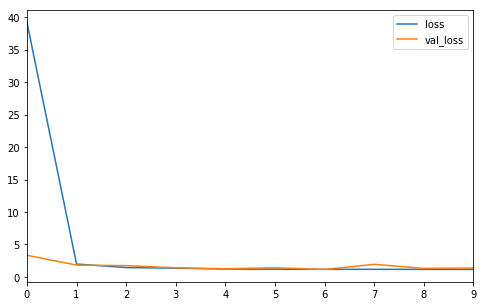

In [191]:
pd.DataFrame(hl1.history)[['loss', 'val_loss']].plot(figsize = (8,5))

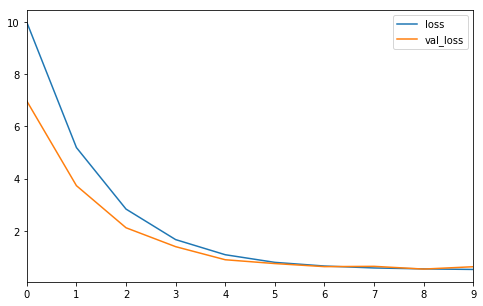

In [192]:
pd.DataFrame(hl2.history)[['loss', 'val_loss']].plot(figsize = (8,5))

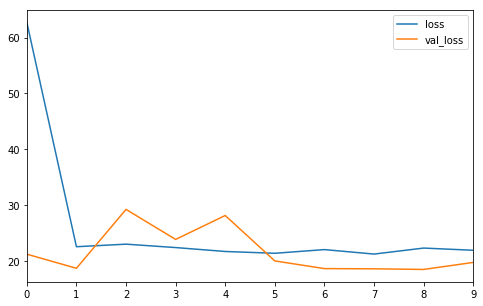

In [193]:
pd.DataFrame(hl1l2.history)[['loss', 'val_loss']].plot(figsize = (8,5))

### Dropout
Ideia: dada uma rede com $N$ neurônios, elimine $p$% deles no início do batch. Ao fim do batch, retorne os neurônios. Repita todo o processo no próximo batch. Resultado: você está treinando um ensemble de modelos, um novo modelo para cada batch de dados. Ao fim, você quer usar o peso compartilhado aprendido por todos os modelos. Em termos práticos, nenhum neurônio pode se co-adaptar a nenhum outros, o que faz com que eles prefiram ter conexões com vários. 

In [199]:
X_input = keras.layers.Input(shape=[28, 28])

h0    = keras.layers.Flatten()(X_input)
h1    = keras.layers.Dense(300, activation='elu', kernel_initializer="he_normal")(h0) 
h1    = keras.layers.BatchNormalization()(h1)
h1    = keras.layers.Dropout(0.3)(h1)
h2    = keras.layers.Dense(200, activation='elu', kernel_initializer="he_normal")(h1)
h2    = keras.layers.BatchNormalization()(h2)
h2    = keras.layers.Dropout(0.3)(h2)
h3    = keras.layers.Dense(100, activation='elu', kernel_initializer="he_normal")(h2)
h3    = keras.layers.BatchNormalization()(h3)
h3    = keras.layers.Dropout(0.3)(h3)
h4    = keras.layers.Dense( 50, activation='elu', kernel_initializer="he_normal")(h3)
h4    = keras.layers.BatchNormalization()(h4)
h4    = keras.layers.Dropout(0.3)(h4)
yhat  = keras.layers.Dense(10, activation="softmax")(h4)
model = keras.models.Model(inputs=[X_input], outputs=[yhat])

model.compile(loss = "sparse_categorical_crossentropy",
             optimizer = "sgd",
             metrics = ["accuracy"])

In [200]:
h = model.fit(X_train, y_train, epochs = 10, 
              validation_data = (X_valid, y_valid))

W0918 14:06:48.891704 4568876480 training_utils.py:1211] When passing input data as arrays, do not specify `steps_per_epoch`/`steps` argument. Please use `batch_size` instead.


Epoch 1/10
55000/55000 [==============================] - 11s 197us/sample - loss: 0.8811 - accuracy: 0.6927 - val_loss: 0.4618 - val_accuracy: 0.8318
Epoch 2/10
55000/55000 [==============================] - 9s 170us/sample - loss: 0.6446 - accuracy: 0.7729 - val_loss: 0.4273 - val_accuracy: 0.8456
Epoch 3/10
55000/55000 [==============================] - 9s 161us/sample - loss: 0.5878 - accuracy: 0.7951 - val_loss: 0.4112 - val_accuracy: 0.8536
Epoch 4/10
55000/55000 [==============================] - 9s 164us/sample - loss: 0.5543 - accuracy: 0.8049 - val_loss: 0.3896 - val_accuracy: 0.8592
Epoch 5/10
55000/55000 [==============================] - 9s 161us/sample - loss: 0.5389 - accuracy: 0.8113 - val_loss: 0.3829 - val_accuracy: 0.8630
Epoch 6/10
55000/55000 [==============================] - 9s 164us/sample - loss: 0.5164 - accuracy: 0.8183 - val_loss: 0.3751 - val_accuracy: 0.8632
Epoch 7/10
55000/55000 [==============================] - 9s 164us/sample - loss: 0.5048 - accuracy

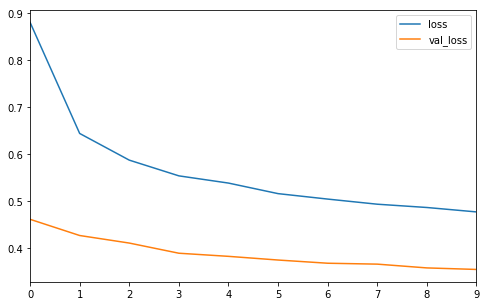

In [201]:
pd.DataFrame(h.history)[['loss', 'val_loss']].plot(figsize = (8,5))

### Dropout de Monte Carlo
Ideia: Dropout aplicado durante a fase de teste. 

In [244]:
class MCDropout(keras.layers.Dropout): 
    def call(self, inputs):
        return super().call(inputs, training=True)

In [246]:
X_input = keras.layers.Input(shape=[28, 28])

h0    = keras.layers.Flatten()(X_input)
h1    = keras.layers.Dense(300, activation='elu', kernel_initializer="he_normal")(h0) 
h1    = keras.layers.BatchNormalization()(h1)
h1    = MCDropout(0.3)(h1)
h2    = keras.layers.Dense(200, activation='elu', kernel_initializer="he_normal")(h1)
h2    = keras.layers.BatchNormalization()(h2)
h2    = MCDropout(0.3)(h2)
h3    = keras.layers.Dense(100, activation='elu', kernel_initializer="he_normal")(h2)
h3    = keras.layers.BatchNormalization()(h3)
h3    = MCDropout(0.3)(h3)
h4    = keras.layers.Dense( 50, activation='elu', kernel_initializer="he_normal")(h3)
h4    = keras.layers.BatchNormalization()(h4)
h4    = MCDropout(0.3)(h4)
yhat  = keras.layers.Dense(10, activation="softmax")(h4)
model = keras.models.Model(inputs=[X_input], outputs=[yhat])

model.compile(loss = "sparse_categorical_crossentropy",
             optimizer = "sgd",
             metrics = ["accuracy"])

In [247]:
h = model.fit(X_train, y_train, epochs = 10, 
              validation_data = (X_valid, y_valid))

W0918 14:41:34.497312 4568876480 training_utils.py:1211] When passing input data as arrays, do not specify `steps_per_epoch`/`steps` argument. Please use `batch_size` instead.


Epoch 1/10
55000/55000 [==============================] - 10s 181us/sample - loss: 0.8902 - accuracy: 0.6936 - val_loss: 0.6183 - val_accuracy: 0.7878
Epoch 2/10
55000/55000 [==============================] - 9s 167us/sample - loss: 0.6437 - accuracy: 0.7766 - val_loss: 0.5377 - val_accuracy: 0.8136
Epoch 3/10
55000/55000 [==============================] - 9s 161us/sample - loss: 0.5884 - accuracy: 0.7949 - val_loss: 0.5271 - val_accuracy: 0.8160
Epoch 4/10
55000/55000 [==============================] - 9s 163us/sample - loss: 0.5613 - accuracy: 0.8044 - val_loss: 0.4899 - val_accuracy: 0.8330
Epoch 5/10
55000/55000 [==============================] - 9s 163us/sample - loss: 0.5398 - accuracy: 0.8105 - val_loss: 0.4747 - val_accuracy: 0.8390
Epoch 6/10
55000/55000 [==============================] - 9s 169us/sample - loss: 0.5200 - accuracy: 0.8189 - val_loss: 0.4560 - val_accuracy: 0.8404
Epoch 7/10
55000/55000 [==============================] - 9s 165us/sample - loss: 0.5067 - accuracy

In [248]:
X_test_scaled = X_test / 255.0

In [249]:
X_test_scaled[:1].shape

(1, 28, 28)

In [250]:
y_pred = model.predict(X_test_scaled[:1])

W0918 14:43:13.707838 4568876480 training_utils.py:1211] When passing input data as arrays, do not specify `steps_per_epoch`/`steps` argument. Please use `batch_size` instead.


In [251]:
np.round(y_pred, 2)

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.1 , 0.  , 0.07, 0.  , 0.83]],
      dtype=float32)

In [252]:
y_test[:1]

array([9], dtype=uint8)

In [253]:
y_probas = np.stack([model.predict(X_test_scaled[:1]) for sample in range(30)]) 

W0918 14:43:36.543435 4568876480 training_utils.py:1211] When passing input data as arrays, do not specify `steps_per_epoch`/`steps` argument. Please use `batch_size` instead.
W0918 14:43:36.552136 4568876480 training_utils.py:1211] When passing input data as arrays, do not specify `steps_per_epoch`/`steps` argument. Please use `batch_size` instead.
W0918 14:43:36.559839 4568876480 training_utils.py:1211] When passing input data as arrays, do not specify `steps_per_epoch`/`steps` argument. Please use `batch_size` instead.
W0918 14:43:36.568785 4568876480 training_utils.py:1211] When passing input data as arrays, do not specify `steps_per_epoch`/`steps` argument. Please use `batch_size` instead.
W0918 14:43:36.576416 4568876480 training_utils.py:1211] When passing input data as arrays, do not specify `steps_per_epoch`/`steps` argument. Please use `batch_size` instead.
W0918 14:43:36.583760 4568876480 training_utils.py:1211] When passing input data as arrays, do not specify `steps_per_ep

In [254]:
y_probas.shape

(30, 1, 10)

In [262]:
np.round(y_probas[:, :1], 2)

array([[[0.  , 0.  , 0.  , 0.  , 0.  , 0.1 , 0.  , 0.34, 0.01, 0.54]],

       [[0.  , 0.  , 0.  , 0.  , 0.  , 0.03, 0.  , 0.04, 0.01, 0.91]],

       [[0.  , 0.  , 0.  , 0.  , 0.  , 0.25, 0.  , 0.02, 0.  , 0.73]],

       [[0.  , 0.01, 0.  , 0.01, 0.  , 0.02, 0.  , 0.22, 0.01, 0.73]],

       [[0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.01, 0.  , 0.98]],

       [[0.  , 0.  , 0.  , 0.  , 0.  , 0.06, 0.  , 0.1 , 0.  , 0.84]],

       [[0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.2 , 0.  , 0.79]],

       [[0.  , 0.  , 0.  , 0.  , 0.  , 0.09, 0.  , 0.57, 0.  , 0.34]],

       [[0.  , 0.  , 0.  , 0.  , 0.  , 0.02, 0.  , 0.08, 0.  , 0.9 ]],

       [[0.  , 0.01, 0.  , 0.  , 0.  , 0.01, 0.  , 0.03, 0.  , 0.95]],

       [[0.  , 0.  , 0.  , 0.  , 0.  , 0.25, 0.  , 0.16, 0.  , 0.59]],

       [[0.  , 0.  , 0.  , 0.  , 0.  , 0.02, 0.  , 0.05, 0.  , 0.93]],

       [[0.  , 0.  , 0.  , 0.  , 0.  , 0.33, 0.  , 0.07, 0.  , 0.59]],

       [[0.  , 0.  , 0.  , 0.  , 0.  , 0.02, 0.  , 0.1 , 0.01, 0

In [256]:
y_proba = y_probas.mean(axis=0)

In [257]:
np.round(y_proba, 2)

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.07, 0.  , 0.14, 0.01, 0.78]],
      dtype=float32)

In [258]:
from scipy.stats import sem, t
from scipy import mean

def cinterval(data, confidence = 0.95):
    n = len(data)
    m = mean(data)
    std_err = sem(data)
    h = std_err * t.ppf((1 + confidence) / 2, n - 1)
    return m-h, m+h

In [263]:
cinterval(np.round(y_probas[:, :1], 2)[:, 0, -1])

(0.7169644806138022, 0.8377022769698159)

### Otimizadores

#### Momento
Ideia: atualização deveria depender de anterior;

In [15]:
optimizer = keras.optimizers.SGD(lr=0.001, momentum=0.9)

#### Nesterov
Ideia: atualização deveria depender de anterior e próxima, para evitar oscilações;

In [16]:
optimizer = keras.optimizers.SGD(lr=0.001, momentum=0.9, nesterov = True)

#### AdaGrad
Ideia: primeiro algoritmo a modificar learning rate de acordo com quão íngrime é a superfície. Esse método, na prática, não funciona bem pois ele tende a diminuir muito rápido o learning rate, fazendo a otimização parar antes do tempo. Ele é importante, contudo, por ser a base para vários algoritmos adaptativos.

In [17]:
optimizer = keras.optimizers.Adagrad(lr=0.01, epsilon=None, decay=0.0)

#### RMSProp
Ideia: ao contrário do Adagrad, uma janela de valores é considerada em lugar de todos os valores passados. Isso desacelera o decaimento do learning rate. Até o surgimento do Adam, este foi o algoritmo mais usado.

In [18]:
optimizer = keras.optimizers.RMSprop(lr=0.001, rho=0.9)

#### Adam & Nadam
Ideia: combina o RMSProp com momento (Adam) e com Nesterov (Nadam).

In [19]:
optimizer = keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999)

#### Treine o último modelo com BN para todos os otimizadores citados

In [20]:
X_input = keras.layers.Input(shape=[28, 28])

h0    = keras.layers.Flatten()(X_input)
h1    = keras.layers.Dense(300, kernel_initializer="he_normal")(h0) 
h1    = keras.layers.BatchNormalization()(h1)
h1    = keras.layers.Activation('elu')(h1)
h2    = keras.layers.Dense(200, kernel_initializer="he_normal")(h1)
h2    = keras.layers.BatchNormalization()(h2)
h2    = keras.layers.Activation('elu')(h1)
h3    = keras.layers.Dense(100, kernel_initializer="he_normal")(h2)
h3    = keras.layers.BatchNormalization()(h3)
h3    = keras.layers.Activation('elu')(h3)
h4    = keras.layers.Dense( 50, kernel_initializer="he_normal")(h3)
h4    = keras.layers.BatchNormalization()(h4)
h4    = keras.layers.Activation('elu')(h4)
yhat  = keras.layers.Dense(10, activation="softmax")(h4)

In [148]:
model = keras.models.Model(inputs=[X_input], outputs=[yhat])
opt = keras.optimizers.SGD(lr=0.001, momentum=0)
model.compile(loss = "sparse_categorical_crossentropy", metrics = ["accuracy"], optimizer = opt)
h_sgd = model.fit(X_train, y_train, epochs = 10, validation_data = (X_valid, y_valid))

W0917 22:04:05.417441 4568876480 training_utils.py:1211] When passing input data as arrays, do not specify `steps_per_epoch`/`steps` argument. Please use `batch_size` instead.


Epoch 1/10
55000/55000 [==============================] - 8s 142us/sample - loss: 0.9390 - accuracy: 0.6954 - val_loss: 0.6442 - val_accuracy: 0.7960
Epoch 2/10
55000/55000 [==============================] - 7s 128us/sample - loss: 0.6450 - accuracy: 0.7898 - val_loss: 0.5438 - val_accuracy: 0.8228
Epoch 3/10
55000/55000 [==============================] - 7s 135us/sample - loss: 0.5747 - accuracy: 0.8085 - val_loss: 0.4991 - val_accuracy: 0.8388
Epoch 4/10
55000/55000 [==============================] - 7s 134us/sample - loss: 0.5365 - accuracy: 0.8184 - val_loss: 0.4710 - val_accuracy: 0.8446
Epoch 5/10
55000/55000 [==============================] - 7s 133us/sample - loss: 0.5110 - accuracy: 0.8253 - val_loss: 0.4531 - val_accuracy: 0.8512
Epoch 6/10
55000/55000 [==============================] - 7s 131us/sample - loss: 0.4889 - accuracy: 0.8315 - val_loss: 0.4382 - val_accuracy: 0.8566
Epoch 7/10
55000/55000 [==============================] - 7s 133us/sample - loss: 0.4739 - accuracy:

In [146]:
model = keras.models.Model(inputs=[X_input], outputs=[yhat])
opt = keras.optimizers.SGD(lr=0.001, momentum=0.9)
model.compile(loss = "sparse_categorical_crossentropy", metrics = ["accuracy"], optimizer = opt)
h_momentum = model.fit(X_train, y_train, epochs = 10, validation_data = (X_valid, y_valid))

W0917 22:02:48.774184 4568876480 training_utils.py:1211] When passing input data as arrays, do not specify `steps_per_epoch`/`steps` argument. Please use `batch_size` instead.


Epoch 1/10
55000/55000 [==============================] - 10s 173us/sample - loss: 0.4293 - accuracy: 0.8498 - val_loss: 0.3703 - val_accuracy: 0.8664
Epoch 2/10
55000/55000 [==============================] - 7s 136us/sample - loss: 0.3871 - accuracy: 0.8618 - val_loss: 0.3479 - val_accuracy: 0.8778
Epoch 3/10
55000/55000 [==============================] - 8s 137us/sample - loss: 0.3593 - accuracy: 0.8716 - val_loss: 0.3431 - val_accuracy: 0.8732
Epoch 4/10
55000/55000 [==============================] - 8s 137us/sample - loss: 0.3394 - accuracy: 0.8775 - val_loss: 0.3425 - val_accuracy: 0.8746
Epoch 5/10
55000/55000 [==============================] - 7s 135us/sample - loss: 0.3230 - accuracy: 0.8843 - val_loss: 0.3228 - val_accuracy: 0.8820
Epoch 6/10
55000/55000 [==============================] - 7s 136us/sample - loss: 0.3061 - accuracy: 0.8893 - val_loss: 0.3189 - val_accuracy: 0.8838
Epoch 7/10
55000/55000 [==============================] - 7s 135us/sample - loss: 0.2957 - accuracy

In [149]:
model = keras.models.Model(inputs=[X_input], outputs=[yhat])
opt = keras.optimizers.SGD(lr=0.001, momentum=0.9, nesterov = True)
model.compile(loss = "sparse_categorical_crossentropy", metrics = ["accuracy"], optimizer = opt)
h_nesterov = model.fit(X_train, y_train, epochs = 10, validation_data = (X_valid, y_valid))

W0917 22:05:19.918262 4568876480 training_utils.py:1211] When passing input data as arrays, do not specify `steps_per_epoch`/`steps` argument. Please use `batch_size` instead.


Epoch 1/10
55000/55000 [==============================] - 8s 152us/sample - loss: 0.4231 - accuracy: 0.8525 - val_loss: 0.3767 - val_accuracy: 0.8642
Epoch 2/10
55000/55000 [==============================] - 8s 137us/sample - loss: 0.3831 - accuracy: 0.8629 - val_loss: 0.3557 - val_accuracy: 0.8744
Epoch 3/10
55000/55000 [==============================] - 8s 141us/sample - loss: 0.3576 - accuracy: 0.8723 - val_loss: 0.3463 - val_accuracy: 0.8742
Epoch 4/10
55000/55000 [==============================] - 8s 143us/sample - loss: 0.3374 - accuracy: 0.8790 - val_loss: 0.3314 - val_accuracy: 0.8794
Epoch 5/10
55000/55000 [==============================] - 8s 140us/sample - loss: 0.3214 - accuracy: 0.8844 - val_loss: 0.3301 - val_accuracy: 0.8780
Epoch 6/10
55000/55000 [==============================] - 8s 138us/sample - loss: 0.3036 - accuracy: 0.8905 - val_loss: 0.3376 - val_accuracy: 0.8764
Epoch 7/10
55000/55000 [==============================] - 8s 140us/sample - loss: 0.2940 - accuracy:

In [150]:
model = keras.models.Model(inputs=[X_input], outputs=[yhat])
opt = keras.optimizers.RMSprop(lr=0.001, rho=0.9)
model.compile(loss = "sparse_categorical_crossentropy", metrics = ["accuracy"], optimizer = opt)
h_rms = model.fit(X_train, y_train, epochs = 10, validation_data = (X_valid, y_valid))

W0917 22:07:26.163295 4568876480 training_utils.py:1211] When passing input data as arrays, do not specify `steps_per_epoch`/`steps` argument. Please use `batch_size` instead.


Epoch 1/10
55000/55000 [==============================] - 12s 210us/sample - loss: 0.4255 - accuracy: 0.8455 - val_loss: 0.3674 - val_accuracy: 0.8630
Epoch 2/10
55000/55000 [==============================] - 10s 184us/sample - loss: 0.3524 - accuracy: 0.8687 - val_loss: 0.3879 - val_accuracy: 0.8538
Epoch 3/10
55000/55000 [==============================] - 10s 175us/sample - loss: 0.3213 - accuracy: 0.8815 - val_loss: 0.3390 - val_accuracy: 0.8734
Epoch 4/10
55000/55000 [==============================] - 10s 175us/sample - loss: 0.3009 - accuracy: 0.8881 - val_loss: 0.3790 - val_accuracy: 0.8552
Epoch 5/10
55000/55000 [==============================] - 10s 174us/sample - loss: 0.2830 - accuracy: 0.8953 - val_loss: 0.3273 - val_accuracy: 0.8802
Epoch 6/10
55000/55000 [==============================] - 10s 175us/sample - loss: 0.2665 - accuracy: 0.9023 - val_loss: 0.3187 - val_accuracy: 0.8876
Epoch 7/10
55000/55000 [==============================] - 10s 178us/sample - loss: 0.2572 - ac

In [151]:
model = keras.models.Model(inputs=[X_input], outputs=[yhat])
opt = keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999)
model.compile(loss = "sparse_categorical_crossentropy", metrics = ["accuracy"], optimizer = opt)
h_adam = model.fit(X_train, y_train, epochs = 10, validation_data = (X_valid, y_valid))

W0917 22:09:05.347188 4568876480 training_utils.py:1211] When passing input data as arrays, do not specify `steps_per_epoch`/`steps` argument. Please use `batch_size` instead.


Epoch 1/10
55000/55000 [==============================] - 9s 164us/sample - loss: 0.2193 - accuracy: 0.9193 - val_loss: 0.3316 - val_accuracy: 0.8874
Epoch 2/10
55000/55000 [==============================] - 8s 146us/sample - loss: 0.2069 - accuracy: 0.9223 - val_loss: 0.3221 - val_accuracy: 0.8822
Epoch 3/10
55000/55000 [==============================] - 8s 146us/sample - loss: 0.1988 - accuracy: 0.9259 - val_loss: 0.3510 - val_accuracy: 0.8826
Epoch 4/10
55000/55000 [==============================] - 8s 143us/sample - loss: 0.1914 - accuracy: 0.9284 - val_loss: 0.3478 - val_accuracy: 0.8782
Epoch 5/10
55000/55000 [==============================] - 8s 151us/sample - loss: 0.1810 - accuracy: 0.9324 - val_loss: 0.3250 - val_accuracy: 0.8912
Epoch 6/10
55000/55000 [==============================] - 8s 146us/sample - loss: 0.1738 - accuracy: 0.9347 - val_loss: 0.3245 - val_accuracy: 0.8920
Epoch 7/10
55000/55000 [==============================] - 8s 146us/sample - loss: 0.1684 - accuracy:

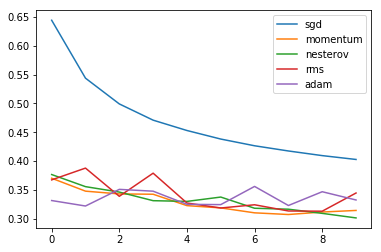

In [158]:
plt.plot(h_sgd.history['val_loss'], label = 'sgd')
plt.plot(h_momentum.history['val_loss'], label = 'momentum')
plt.plot(h_nesterov.history['val_loss'], label = 'nesterov')
plt.plot(h_rms.history['val_loss'], label = 'rms')
plt.plot(h_adam.history['val_loss'], label = 'adam')
plt.legend()

__Observações__:

* Se métodos adaptativos parecem não generalizar bem no seu caso, use SGD com Nesterov sem adaptação; o artigo The Marginal Value of Adaptive Gradient Methods in Machine Learning (2017, https://arxiv.org/abs/1705.08292) mostra que métodos adaptativos podem não generalizar tão bem em muitos casos;
* Futuras versões do tensorflow devem suportar o algoritmo AdaBound (Adaptive Gradient Methods with Dynamic Bound of Learning Rate, 2019, https://arxiv.org/abs/1902.09843) que tenta corrigir os problemas de generalização dos métodos adaptativos; 

### Política de escalonamento da taxa de aprendizado

Técnicas:
    
* __Potência__: redução da taxa por um fator de acordo com uma função de potência; Em keras, basta usar o parâmetro decay do otimizador: `optimizer = keras.optimizers.SGD(lr=0.01, decay=1e-4)`
* __Exponencial__: redução da taxa por um fator de acordo com uma função exponencial;
* __Degraus__: taxa é a mesma durante um certo número de épocas, quando é reduzida. O processo se repete assim por vários degraus.
* __Desempenho__: similar a early stopping com redução de taxas quando desempemnho não é mais observado. Em Keras, use a callback: `lr_scheduler = keras.callbacks.ReduceLROnPlateau(factor=0.5, patience=5)`

In [64]:
# cai um fator de 1/2 a cada s steps, 1/3 dps de outros s steps, 1/4 dpos novos s steps, ...
# taxa de decaimento eh o inverso de s
def potencia(tx0 = 0.01, decay = 1/3, c = 1, n = 10):
    return np.array([tx0 / (1 + t*decay)**c for t in range(n)])

# diminua por um fator de 10 cada s passos
def exponencial(tx0 = 0.01, s = 1, n = 10):
    return np.array([tx0 * 0.1**(t/s) for t in range(n)])

# diminui conforme escala discreta dada
def get_val(val, steps):
    for s in steps:
        if val < s[0]:
            return s[1]
    return 0
def degrau(steps, n = 10): 
    return [get_val(t, steps) for t in range(n)]

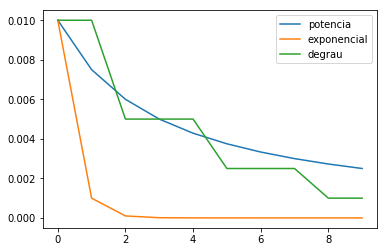

In [65]:
plt.plot(potencia(tx0 = 0.01, decay = 1/3, n = 10), label = 'potencia')
plt.plot(exponencial(tx0 = 0.01, n = 10), label = 'exponencial')
plt.plot(degrau(steps = [(2, 0.01), (5, 0.005), (8, 0.0025), (10000, 0.001)], 
                n = 10), label = 'degrau')

plt.legend()

Para o caso __exponencial__:

In [160]:
def exponential_decay(lr0 = 0.01, s = 20):
    def exponential_decay_fn(epoch):
        return lr0 * 0.1**(epoch / s)
    return exponential_decay_fn

exponential_decay_fn = exponential_decay(lr0=0.01, s=20)

In [161]:
lr_scheduler = keras.callbacks.LearningRateScheduler(exponential_decay_fn)

In [162]:
model = keras.models.Model(inputs=[X_input], outputs=[yhat])
opt = keras.optimizers.RMSprop(lr=0.001, rho=0.9)
model.compile(loss = "sparse_categorical_crossentropy", metrics = ["accuracy"], 
              optimizer = opt, callbacks=[lr_scheduler])
h_rms = model.fit(X_train, y_train, epochs = 10, validation_data = (X_valid, y_valid))

W0917 22:40:05.176612 4568876480 training_utils.py:1211] When passing input data as arrays, do not specify `steps_per_epoch`/`steps` argument. Please use `batch_size` instead.


Epoch 1/10
55000/55000 [==============================] - 11s 204us/sample - loss: 0.1378 - accuracy: 0.9478 - val_loss: 0.3679 - val_accuracy: 0.8918
Epoch 2/10
55000/55000 [==============================] - 10s 180us/sample - loss: 0.1301 - accuracy: 0.9516 - val_loss: 0.4168 - val_accuracy: 0.8868
Epoch 3/10
55000/55000 [==============================] - 10s 178us/sample - loss: 0.1274 - accuracy: 0.9529 - val_loss: 0.4627 - val_accuracy: 0.8850
Epoch 4/10
55000/55000 [==============================] - 10s 181us/sample - loss: 0.1241 - accuracy: 0.9532 - val_loss: 0.4113 - val_accuracy: 0.8910
Epoch 5/10
55000/55000 [==============================] - 10s 184us/sample - loss: 0.1192 - accuracy: 0.9563 - val_loss: 0.4728 - val_accuracy: 0.8782
Epoch 6/10
55000/55000 [==============================] - 10s 180us/sample - loss: 0.1149 - accuracy: 0.9577 - val_loss: 0.4707 - val_accuracy: 0.8794
Epoch 7/10
55000/55000 [==============================] - 10s 178us/sample - loss: 0.1135 - ac

Para o caso __degraus__:

In [164]:
def piecewise_constant_fn(epoch): 
    if epoch < 3:
        return 0.01 
    elif epoch < 6: 
        return 0.005
    else:
        return 0.001
    
lr_scheduler = keras.callbacks.LearningRateScheduler(piecewise_constant_fn)

In [165]:
model = keras.models.Model(inputs=[X_input], outputs=[yhat])
opt = keras.optimizers.RMSprop(lr=0.001, rho=0.9)
model.compile(loss = "sparse_categorical_crossentropy", metrics = ["accuracy"], 
              optimizer = opt, callbacks=[lr_scheduler])
h_rms = model.fit(X_train, y_train, epochs = 10, validation_data = (X_valid, y_valid))

W0917 22:43:15.021686 4568876480 training_utils.py:1211] When passing input data as arrays, do not specify `steps_per_epoch`/`steps` argument. Please use `batch_size` instead.


Epoch 1/10
55000/55000 [==============================] - 13s 227us/sample - loss: 0.1022 - accuracy: 0.9623 - val_loss: 0.4851 - val_accuracy: 0.8876
Epoch 2/10
55000/55000 [==============================] - 10s 182us/sample - loss: 0.0962 - accuracy: 0.9653 - val_loss: 0.5153 - val_accuracy: 0.8852
Epoch 3/10
55000/55000 [==============================] - 10s 181us/sample - loss: 0.0955 - accuracy: 0.9654 - val_loss: 0.5924 - val_accuracy: 0.8832
Epoch 4/10
55000/55000 [==============================] - 10s 181us/sample - loss: 0.0946 - accuracy: 0.9655 - val_loss: 0.5204 - val_accuracy: 0.8854
Epoch 5/10
55000/55000 [==============================] - 10s 181us/sample - loss: 0.0898 - accuracy: 0.9671 - val_loss: 0.5745 - val_accuracy: 0.8806
Epoch 6/10
55000/55000 [==============================] - 10s 183us/sample - loss: 0.0867 - accuracy: 0.9683 - val_loss: 0.5291 - val_accuracy: 0.8872
Epoch 7/10
55000/55000 [==============================] - 10s 188us/sample - loss: 0.0866 - ac

Para o caso __desempenho__:

In [167]:
lr_scheduler = keras.callbacks.ReduceLROnPlateau(factor=0.5, patience=3)

In [168]:
model = keras.models.Model(inputs=[X_input], outputs=[yhat])
opt = keras.optimizers.RMSprop(lr=0.001, rho=0.9)
model.compile(loss = "sparse_categorical_crossentropy", metrics = ["accuracy"], 
              optimizer = opt, callbacks=[lr_scheduler])
h_rms = model.fit(X_train, y_train, epochs = 10, validation_data = (X_valid, y_valid))

W0917 22:46:20.700640 4568876480 training_utils.py:1211] When passing input data as arrays, do not specify `steps_per_epoch`/`steps` argument. Please use `batch_size` instead.


Epoch 1/10
55000/55000 [==============================] - 12s 211us/sample - loss: 0.0797 - accuracy: 0.9711 - val_loss: 0.5747 - val_accuracy: 0.8868
Epoch 2/10
55000/55000 [==============================] - 10s 186us/sample - loss: 0.0748 - accuracy: 0.9733 - val_loss: 0.5571 - val_accuracy: 0.8890
Epoch 3/10
55000/55000 [==============================] - 10s 190us/sample - loss: 0.0742 - accuracy: 0.9735 - val_loss: 0.7118 - val_accuracy: 0.8802
Epoch 4/10
55000/55000 [==============================] - 10s 185us/sample - loss: 0.0746 - accuracy: 0.9737 - val_loss: 0.5612 - val_accuracy: 0.8948
Epoch 5/10
55000/55000 [==============================] - 10s 185us/sample - loss: 0.0712 - accuracy: 0.9743 - val_loss: 0.5932 - val_accuracy: 0.8834
Epoch 6/10
55000/55000 [==============================] - 10s 182us/sample - loss: 0.0680 - accuracy: 0.9765 - val_loss: 0.6318 - val_accuracy: 0.8830
Epoch 7/10
55000/55000 [==============================] - 10s 186us/sample - loss: 0.0677 - ac

## Transferência de Aprendizado

Vamos inicialmente treinar a coleção fashion, deixando de lado as classes sandálias e camisas.

In [66]:
# loading fashion mnist
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

In [67]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
                   "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [70]:
# obtem coleecao sem sandalias e shirts
X_train_8 = X_train_full[(y_train_full<5) | (y_train_full>6)]
y_train_8 = y_train_full[(y_train_full<5) | (y_train_full>6)]
X_test_8 = X_test[(y_test<5) | (y_test>6)]
y_test_8 = y_test[(y_test<5) | (y_test>6)]  

In [71]:
y_test_8[y_test_8 == 7] = 5  
y_test_8[y_test_8 == 8] = 6  
y_test_8[y_test_8 == 9] = 7
y_train_8[y_train_8 == 7] = 5  
y_train_8[y_train_8 == 8] = 6  
y_train_8[y_train_8 == 9] = 7

In [72]:
X_train_full.shape, X_train_8.shape

((60000, 28, 28), (48000, 28, 28))

In [73]:
# data normalization
X_valid_8, X_train_8 = X_train_8[:4000] / 255.0, X_train_8[4000:] / 255.0
y_valid_8, y_train_8 = y_train_8[:4000], y_train_8[4000:]

In [74]:
X_input = keras.layers.Input(shape=[28, 28])

h0    = keras.layers.Flatten()(X_input)
h1    = keras.layers.Dense(300, kernel_initializer="he_normal")(h0) 
h1    = keras.layers.BatchNormalization()(h1)
h1    = keras.layers.Activation('elu', name = 'h1')(h1)
h2    = keras.layers.Dense(200, kernel_initializer="he_normal")(h1)
h2    = keras.layers.BatchNormalization()(h2)
h2    = keras.layers.Activation('elu', name = 'h2')(h1)
h3    = keras.layers.Dense(100, kernel_initializer="he_normal")(h2)
h3    = keras.layers.BatchNormalization()(h3)
h3    = keras.layers.Activation('elu', name = 'h3')(h3)
h4    = keras.layers.Dense( 50, kernel_initializer="he_normal")(h3)
h4    = keras.layers.BatchNormalization()(h4)
h4    = keras.layers.Activation('elu', name = 'h4')(h4)
yhat  = keras.layers.Dense(  8, activation="softmax", name = 'out')(h4)
model = keras.models.Model(inputs=[X_input], outputs=[yhat])

model.compile(loss = "sparse_categorical_crossentropy",
             optimizer = "sgd",
             metrics = ["accuracy"])

In [75]:
h = model.fit(X_train_8, y_train_8, epochs = 10, 
             validation_data = (X_valid_8, y_valid_8))

W0923 14:33:07.969434 4731512256 training_utils.py:1211] When passing input data as arrays, do not specify `steps_per_epoch`/`steps` argument. Please use `batch_size` instead.


Epoch 1/10
44000/44000 [==============================] - 7s 154us/sample - loss: 0.3975 - accuracy: 0.8703 - val_loss: 0.2655 - val_accuracy: 0.9107
Epoch 2/10
44000/44000 [==============================] - 5s 125us/sample - loss: 0.2852 - accuracy: 0.9049 - val_loss: 0.2405 - val_accuracy: 0.9178
Epoch 3/10
44000/44000 [==============================] - 5s 122us/sample - loss: 0.2553 - accuracy: 0.9128 - val_loss: 0.2420 - val_accuracy: 0.9143
Epoch 4/10
44000/44000 [==============================] - 5s 124us/sample - loss: 0.2366 - accuracy: 0.9190 - val_loss: 0.2304 - val_accuracy: 0.9187
Epoch 5/10
44000/44000 [==============================] - 5s 123us/sample - loss: 0.2227 - accuracy: 0.9240 - val_loss: 0.2107 - val_accuracy: 0.9265
Epoch 6/10
44000/44000 [==============================] - 5s 123us/sample - loss: 0.2065 - accuracy: 0.9292 - val_loss: 0.2130 - val_accuracy: 0.9250
Epoch 7/10
44000/44000 [==============================] - 5s 123us/sample - loss: 0.1958 - accuracy:

In [76]:
model.save('model_8.h5')

Vamos agora treinar a coleção fashion, apenas com as classes sandálias e camisas, usando transferência de aprendizado.

In [77]:
X_train_2 = X_train_full[(y_train_full==5) | (y_train_full==6)]
y_train_2 = y_train_full[(y_train_full==5) | (y_train_full==6)]
X_test_2 = X_test[(y_test==5) | (y_test==6)]
y_test_2 = y_test[(y_test==5) | (y_test==6)]

In [78]:
y_test_2 = (y_test_2 == 5).astype(int)  
y_train_2 = (y_train_2 == 5).astype(int)

In [79]:
X_train_full.shape, X_train_2.shape, 

((60000, 28, 28), (12000, 28, 28))

In [80]:
# data normalization
X_valid_2, X_train_2 = X_train_2[:1200] / 255.0, X_train_2[1200:] / 255.0
y_valid_2, y_train_2 = y_train_2[:1200], y_train_2[1200:]

Primeiro, treino direto, para termos uma referência:

In [81]:
X_input = keras.layers.Input(shape=[28, 28])

h0    = keras.layers.Flatten()(X_input)
h1    = keras.layers.Dense(300, kernel_initializer="he_normal")(h0) 
h1    = keras.layers.BatchNormalization()(h1)
h1    = keras.layers.Activation('elu')(h1)
h2    = keras.layers.Dense(200, kernel_initializer="he_normal")(h1)
h2    = keras.layers.BatchNormalization()(h2)
h2    = keras.layers.Activation('elu')(h1)
h3    = keras.layers.Dense(100, kernel_initializer="he_normal")(h2)
h3    = keras.layers.BatchNormalization()(h3)
h3    = keras.layers.Activation('elu')(h3)
h4    = keras.layers.Dense( 50, kernel_initializer="he_normal")(h3)
h4    = keras.layers.BatchNormalization()(h4)
h4    = keras.layers.Activation('elu')(h4)
yhat  = keras.layers.Dense(1, activation="sigmoid")(h4)
model = keras.models.Model(inputs=[X_input], outputs=[yhat])

model.compile(loss = "binary_crossentropy",
             optimizer = "sgd",
             metrics = ["accuracy"])

In [82]:
h = model.fit(X_train_2, y_train_2, epochs = 10, 
             validation_data = (X_valid_2, y_valid_2))

W0923 14:34:41.027698 4731512256 training_utils.py:1211] When passing input data as arrays, do not specify `steps_per_epoch`/`steps` argument. Please use `batch_size` instead.


Epoch 1/10
10800/10800 [==============================] - 2s 212us/sample - loss: 0.0749 - accuracy: 0.9794 - val_loss: 0.0270 - val_accuracy: 0.9975
Epoch 2/10
10800/10800 [==============================] - 1s 126us/sample - loss: 0.0275 - accuracy: 0.9949 - val_loss: 0.0162 - val_accuracy: 0.9992
Epoch 3/10
10800/10800 [==============================] - 1s 125us/sample - loss: 0.0197 - accuracy: 0.9957 - val_loss: 0.0116 - val_accuracy: 0.9992
Epoch 4/10
10800/10800 [==============================] - 1s 130us/sample - loss: 0.0151 - accuracy: 0.9973 - val_loss: 0.0117 - val_accuracy: 0.9992
Epoch 5/10
10800/10800 [==============================] - 1s 125us/sample - loss: 0.0144 - accuracy: 0.9969 - val_loss: 0.0102 - val_accuracy: 0.9992
Epoch 6/10
10800/10800 [==============================] - 1s 130us/sample - loss: 0.0119 - accuracy: 0.9969 - val_loss: 0.0090 - val_accuracy: 0.9992
Epoch 7/10
10800/10800 [==============================] - 1s 134us/sample - loss: 0.0129 - accuracy:

Agora, trasnferencia:

In [83]:
model_8 = keras.models.load_model('model_8.h5')

# use close se vc quer uma copia do modelo em memoria
# que possa ser modificada sem mudar o modelo original em memoria
model_8_clone = keras.models.clone_model(model_8)
model_8_clone.set_weights(model_8.get_weights())

In [84]:
model_8.summary()

Model: "model_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_8 (InputLayer)         [(None, 28, 28)]          0         
_________________________________________________________________
flatten_7 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_35 (Dense)             (None, 300)               235500    
_________________________________________________________________
batch_normalization_8 (Batch (None, 300)               1200      
_________________________________________________________________
h1 (Activation)              (None, 300)               0         
_________________________________________________________________
h2 (Activation)              (None, 300)               0         
_________________________________________________________________
dense_37 (Dense)             (None, 100)               3010

In [85]:
model_2_usando_8_nohead = keras.models.Model(inputs = model_8_clone.input, 
                                             outputs = model_8_clone.get_layer('h4').output)

In [86]:
x = model_2_usando_8_nohead.output
yhat = keras.layers.Dense(1, activation="sigmoid")(x)

model_2_usando_8 = keras.models.Model(inputs = model_2_usando_8_nohead.input, outputs = yhat)

In [87]:
model_2_usando_8.summary()

Model: "model_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_8 (InputLayer)         [(None, 28, 28)]          0         
_________________________________________________________________
flatten_7 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_35 (Dense)             (None, 300)               235500    
_________________________________________________________________
batch_normalization_8 (Batch (None, 300)               1200      
_________________________________________________________________
h1 (Activation)              (None, 300)               0         
_________________________________________________________________
h2 (Activation)              (None, 300)               0         
_________________________________________________________________
dense_37 (Dense)             (None, 100)               301

In [88]:
for layer in model_2_usando_8.layers[:-1]: 
    layer.trainable = False

In [89]:
model_2_usando_8.compile(loss = "binary_crossentropy",
             optimizer = "sgd",
             metrics = ["accuracy"])

In [90]:
h = model_2_usando_8.fit(X_train_2, y_train_2, epochs=10,
                            validation_data=(X_valid_2, y_valid_2))

W0923 14:36:20.727291 4731512256 training_utils.py:1211] When passing input data as arrays, do not specify `steps_per_epoch`/`steps` argument. Please use `batch_size` instead.


Epoch 1/10
10800/10800 [==============================] - 2s 168us/sample - loss: 0.2750 - accuracy: 0.8891 - val_loss: 0.0890 - val_accuracy: 0.9883
Epoch 2/10
10800/10800 [==============================] - 1s 84us/sample - loss: 0.0889 - accuracy: 0.9792 - val_loss: 0.0561 - val_accuracy: 0.9908
Epoch 3/10
10800/10800 [==============================] - 1s 79us/sample - loss: 0.0657 - accuracy: 0.9845 - val_loss: 0.0446 - val_accuracy: 0.9925
Epoch 4/10
10800/10800 [==============================] - 1s 80us/sample - loss: 0.0537 - accuracy: 0.9879 - val_loss: 0.0384 - val_accuracy: 0.9933
Epoch 5/10
10800/10800 [==============================] - 1s 78us/sample - loss: 0.0507 - accuracy: 0.9876 - val_loss: 0.0346 - val_accuracy: 0.9933
Epoch 6/10
10800/10800 [==============================] - 1s 85us/sample - loss: 0.0425 - accuracy: 0.9903 - val_loss: 0.0318 - val_accuracy: 0.9933
Epoch 7/10
10800/10800 [==============================] - 1s 84us/sample - loss: 0.0427 - accuracy: 0.989

In [91]:
for layer in model_2_usando_8.layers[:-1]: 
    layer.trainable = True

In [92]:
optimizer = keras.optimizers.SGD(lr=1e-4) # the default lr is 1e-3 
model_2_usando_8.compile(loss="binary_crossentropy", optimizer=optimizer,
                         metrics=["accuracy"])

In [93]:
h = model_2_usando_8.fit(X_train_2, y_train_2, epochs=16,
                            validation_data=(X_valid_2, y_valid_2))

W0923 14:36:58.146462 4731512256 training_utils.py:1211] When passing input data as arrays, do not specify `steps_per_epoch`/`steps` argument. Please use `batch_size` instead.


Epoch 1/16
10800/10800 [==============================] - 2s 223us/sample - loss: 0.0310 - accuracy: 0.9924 - val_loss: 0.0239 - val_accuracy: 0.9958
Epoch 2/16
10800/10800 [==============================] - 1s 138us/sample - loss: 0.0296 - accuracy: 0.9927 - val_loss: 0.0223 - val_accuracy: 0.9958
Epoch 3/16
10800/10800 [==============================] - 1s 136us/sample - loss: 0.0282 - accuracy: 0.9919 - val_loss: 0.0207 - val_accuracy: 0.9958
Epoch 4/16
10800/10800 [==============================] - 2s 141us/sample - loss: 0.0260 - accuracy: 0.9939 - val_loss: 0.0205 - val_accuracy: 0.9958
Epoch 5/16
10800/10800 [==============================] - 1s 136us/sample - loss: 0.0285 - accuracy: 0.9933 - val_loss: 0.0198 - val_accuracy: 0.9958
Epoch 6/16
10800/10800 [==============================] - 1s 137us/sample - loss: 0.0246 - accuracy: 0.9931 - val_loss: 0.0194 - val_accuracy: 0.9958
Epoch 7/16
10800/10800 [==============================] - 1s 135us/sample - loss: 0.0268 - accuracy: